## Чтение и подготовка данных

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats
pylab.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('Salaries.csv', low_memory=False)

In [4]:
data.BasePay = pd.to_numeric(data.BasePay, 'coerce')
data.OtherPay = pd.to_numeric(data.OtherPay, 'coerce')
data.OvertimePay = pd.to_numeric(data.OvertimePay, 'coerce')
data.Benefits = pd.to_numeric(data.Benefits, 'coerce')
del data['Notes']
del data['Id']
del data['Agency']

In [5]:
data2014 = data[(data.Year == 2014) & ~data.Status.isnull() & (data.BasePay > 0.0) & (data.TotalPayBenefits > 0.0)]
data2014ft = data2014.groupby('Status').get_group('FT')
data2014pt = data2014.groupby('Status').get_group('PT')

In [6]:
data2012 = data[data.Year == 2012]

## Распределение заработных плат

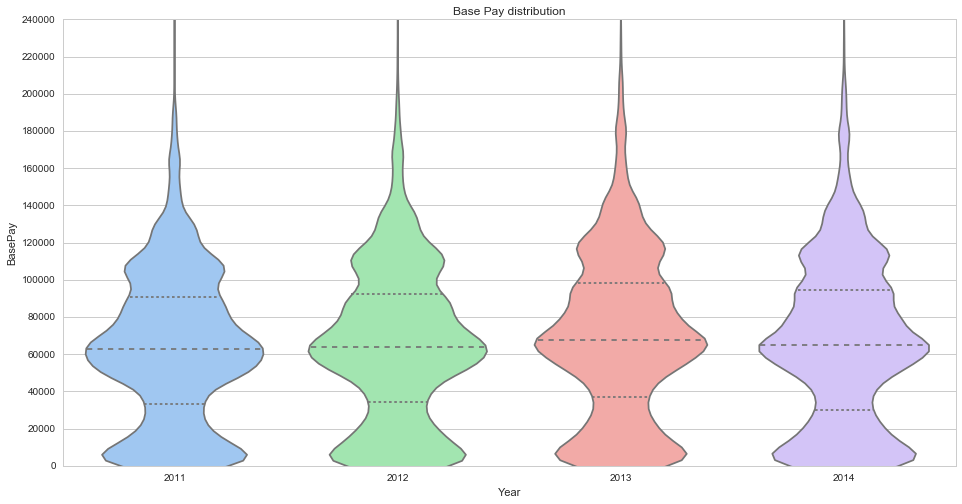

In [7]:
figsize(16, 8)
ax = sns.violinplot(y="BasePay", x="Year", data=data, inner="quartile", palette="pastel");
ax.set_ylim(0, 240000)
ax.set_yticks(np.linspace(0, 240000, 13))
ax.set_title("Base Pay distribution");

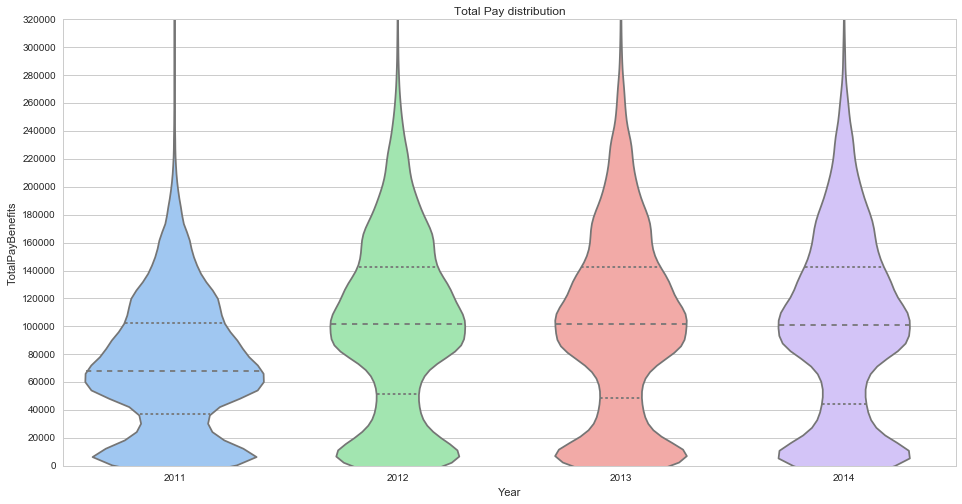

In [8]:
figsize(16, 8)
ax = sns.violinplot(y="TotalPayBenefits", x="Year", data=data, inner="quartile", palette="pastel");
ax.set_ylim(0, 320000)
ax.set_yticks(np.linspace(0, 320000, 17))
ax.set_title("Total Pay distribution");

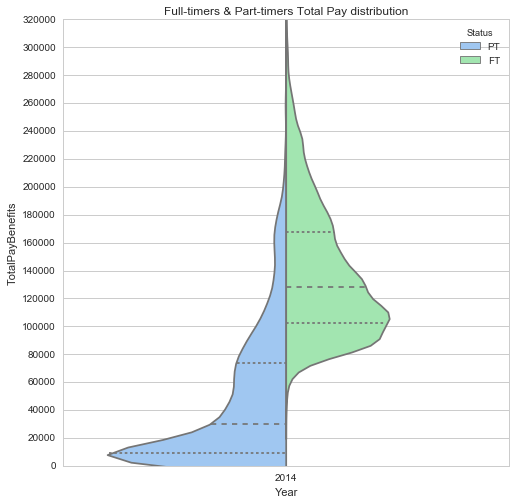

In [9]:
figsize(8,8)
ax = sns.violinplot(y="TotalPayBenefits", x="Year", hue="Status", split=True, data=data2014, 
                    inner="quartile", palette="pastel")
ax.set_ylim(0, 320000)
ax.set_yticks(np.linspace(0, 320000, 17))
ax.set_title("Full-timers & Part-timers Total Pay distribution");

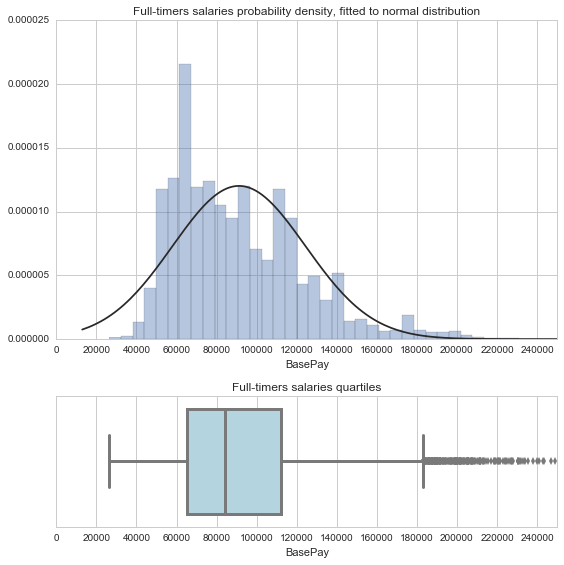

In [10]:
figsize(8, 8)
ax1 = subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = subplot2grid((3, 1), (2, 0))

sns.distplot(data2014ft.BasePay, fit=scipy.stats.norm, ax=ax1, kde=False)
ax1.set_xlim(0, 250000)
ax1.set_xticks(np.linspace(0, 240000, 13))
ax1.set_title("Full-timers salaries probability density, fitted to normal distribution")

sns.boxplot(data2014ft.BasePay, ax=ax2, linewidth=3, color='lightblue')
ax2.set_xlim(0, 250000)
ax2.set_xticks(np.linspace(0, 240000, 13))
ax2.set_title("Full-timers salaries quartiles")
tight_layout()

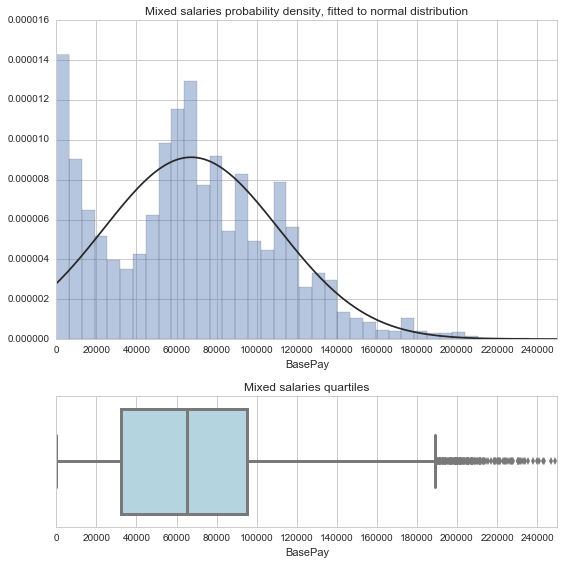

In [11]:
figsize(8, 8)
ax1 = subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = subplot2grid((3, 1), (2, 0))

sns.distplot(data2014.BasePay, fit=scipy.stats.norm, ax=ax1, kde=False)
ax1.set_xlim(0, 250000)
ax1.set_xticks(np.linspace(0, 240000, 13))
ax1.set_title("Mixed salaries probability density, fitted to normal distribution")

sns.boxplot(data2014.BasePay, ax=ax2, linewidth=3, color='lightblue')
ax2.set_xlim(0, 250000)
ax2.set_xticks(np.linspace(0, 240000, 13))
ax2.set_title("Mixed salaries quartiles")
tight_layout()

## Индекс Джини, R/P-20

https://ru.wikipedia.org/wiki/Коэффициент_Джини

https://ru.wikipedia.org/wiki/Список_стран_по_показателям_неравенства_доходов

Согласно исследованиям Credit Suisse, 1% богатейших землян владеют 50% совокупного мирового состояния.
http://www.gazeta.ru/business/2015/01/19/6380305.shtml

In [12]:
def gini_plot(series, label, ax):
    #series = series.dropna()
    #series = series[series > 0.0]
    total_benefit = series.sum()
    pays = series.sort_values()
    ser_len = len(series)
    short_len = int(ser_len * 0.20)
    xs = np.linspace(0.0, 1.0, ser_len)
    ys = pays.values.cumsum() / total_benefit
    
    richest = pays.values[-short_len:].sum()
    poorest = pays.values[:short_len].sum()
    r2p20 = richest / poorest
    r_top20 = 100.0 * richest / total_benefit
    
    gini = 100.0 * (1.0 - pays.values.cumsum().sum() / (pays.values.sum()*ser_len / 2.0))
    
    ax.plot(xs, ys, color='blue')
    ax.fill_between(xs, ys, alpha=0.3, color='blue')
    ax.plot(xs, xs, color='green')
    ax.fill_between(xs, xs, ys, alpha=0.3, color='green')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    ax.fill_between(xs[:short_len], ys[:short_len], alpha=0.3, color='red')
    ax.fill_between(xs[-short_len:], ys[-short_len:], 
                    ys[-short_len:-short_len+1].repeat(short_len), alpha=0.3, color='blue')
    ax.set_title("%s: Gini = %4.1f, R/P 20%% = %4.1f, Top20%% have %4.1f%%" % (label, gini, r2p20, r_top20))

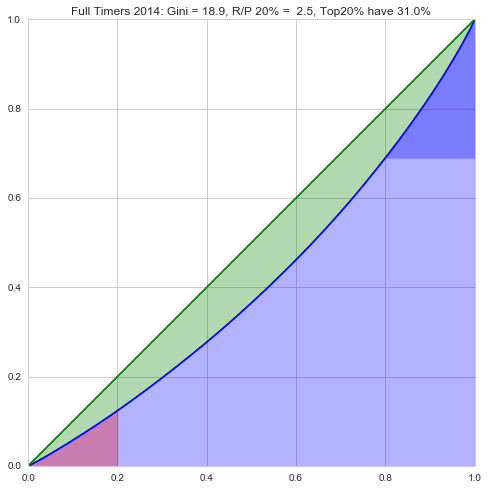

In [13]:
figsize(8, 8)
f, plots = subplots()
gini_plot(data2014ft.TotalPayBenefits, "Full Timers 2014", plots);

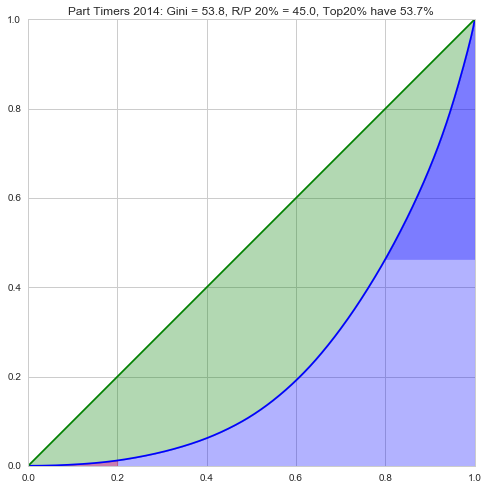

In [14]:
figsize(8, 8)
f, plots = subplots()
gini_plot(data2014pt.TotalPayBenefits, "Part Timers 2014", plots);

## Эффект Матфея

https://ru.wikipedia.org/wiki/Эффект_Матфея

https://ru.wikipedia.org/wiki/Капитал_в_XXI_веке

Year
2012    3.696940e+09
2013    3.814772e+09
2014    3.821866e+09
Name: TotalPayBenefits, dtype: float64

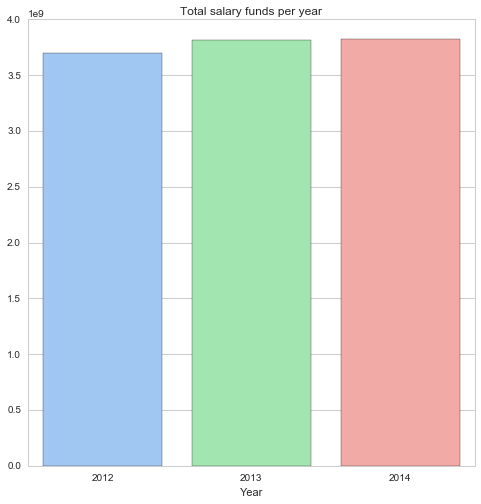

In [15]:
figsize(8, 8)
v1 = data[data.Year != 2011].groupby('Year').TotalPayBenefits.sum()
ax = sns.barplot(v1.index, v1.values, palette="pastel")
ax.set_title("Total salary funds per year");
v1

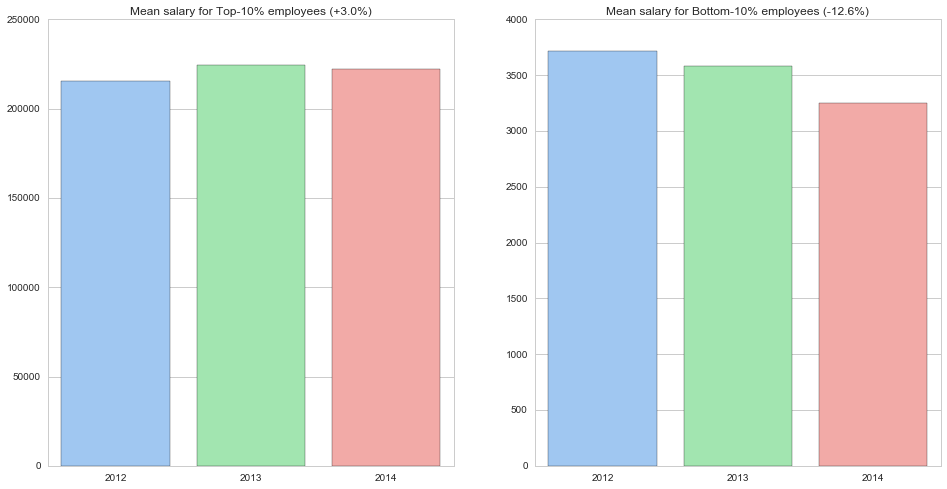

In [16]:
richest = []
poorest = []
for k, g in data[data.Year != 2011].groupby('Year'):
    series = g.TotalPayBenefits.sort_values()
    ser_len = len(series)
    short_len = int(ser_len * 0.10)
    
    total = series.mean()
    richest.append(series.values[-short_len:].mean())
    poorest.append(series.values[:short_len].mean())

figsize(16, 8)
f, plots = subplots(1, 2)

ax = sns.barplot((2012, 2013, 2014), richest, palette="pastel", ax=plots[0])
rich_growth = 100.0 * richest[-1] / richest[0] - 100.0
plots[0].set_title("Mean salary for Top-10%% employees (%+.1f%%)" % rich_growth);


ax = sns.barplot((2012, 2013, 2014), poorest, palette="pastel", ax=plots[1])
poor_growth = 100.0 * poorest[-1] / poorest[0] - 100.0
plots[1].set_title("Mean salary for Bottom-10%% employees (%+.1f%%)" % poor_growth);

## Карьерный рост

In [17]:
growth_data = pd.merge(data2012[data2012.BasePay > 70000.0], data2014[data2014.BasePay > 70000.0], 
                  on=['EmployeeName', 'EmployeeName'], how='inner')
#growth_data['TotalGrowth'] = 1.0 * growth_data.TotalPayBenefits_y / growth_data.TotalPayBenefits_x - 1.0
growth_data['BaseGrowth'] = np.sqrt(1.0 * growth_data.BasePay_y / growth_data.BasePay_x) - 1.0

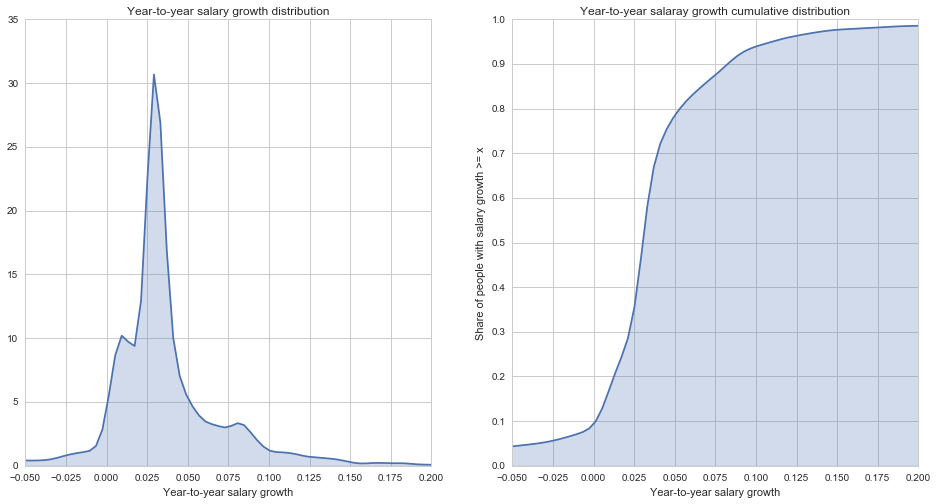

In [18]:
figsize(16,8)
f, plots = subplots(1, 2)

sns.kdeplot(growth_data.BaseGrowth, bw=0.005, shade=True, ax=plots[0], gridsize=200, legend=False);
plots[0].set_xlim((-0.05, 0.20))
plots[0].set_xticks(np.linspace(-0.05, 0.20, 11))
plots[0].set_xlabel("Year-to-year salary growth")
plots[0].set_title("Year-to-year salary growth distribution");

sns.kdeplot(growth_data.BaseGrowth, bw=0.005, shade=True, ax=plots[1], gridsize=200, legend=False, cumulative=True);
plots[1].set_xlim((-0.05, 0.20))
plots[1].set_xticks(np.linspace(-0.05, 0.20, 11))
plots[1].set_yticks(np.linspace(0.0, 1.0, 11))
plots[1].set_xlabel("Year-to-year salary growth")
plots[1].set_ylabel("Share of people with salary growth >= x")
plots[1].set_title("Year-to-year salaray growth cumulative distribution");

## Статистика должностей

In [19]:
len(data2014.groupby('JobTitle'))

986

In [20]:
data2014.groupby('JobTitle').EmployeeName.count().sort_values(ascending=False).head(20)

JobTitle
Transit Operator                2451
Special Nurse                   1456
Registered Nurse                1212
Public Svc Aide-Public Works     912
Firefighter                      810
Custodian                        797
Police Officer 3                 775
Recreation Leader                689
Patient Care Assistant           648
Deputy Sheriff                   608
Police Officer                   551
Public Service Trainee           493
HSA Sr Eligibility Worker        465
Attorney (Civil/Criminal)        381
Sergeant 3                       367
Porter                           356
General Laborer                  337
Police Officer 2                 334
Senior Clerk                     311
EMT/Paramedic/Firefighter        311
Name: EmployeeName, dtype: int64

In [21]:
data2014.groupby('JobTitle').TotalPayBenefits.mean().sort_values(ascending=False).head(20)

JobTitle
Chief Investment Officer          436224.360000
Chief of Police                   418019.220000
Chief, Fire Department            417435.100000
Gen Mgr, Public Trnsp Dept        379918.720000
Dep Chf of Dept (Fire Dept)       368006.350000
Administrator, DPH                365561.140000
Mayor                             364814.510000
Dept Head V                       361932.378000
Executive Contract Employee       354918.300000
Adm, SFGH Medical Center          349527.750000
Controller                        347713.880000
Asst Chf of Dept (Fire Dept)      344702.513333
Deputy Chief 3                    339794.811250
Port Director                     329147.300000
Assistant Deputy Chief 2          324555.640000
Asst Med Examiner                 323497.457500
Emergency Medical Svcs Chief      318297.510000
District Attorney                 314612.090000
Manager, Dept Public Health       314138.620000
Battalion Chief, Fire Suppress    309241.047742
Name: TotalPayBenefits, dtype: 

In [22]:
data.groupby('JobTitle').get_group('Mayor')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
36194,Edwin Lee,Mayor,260574.05,0.0,0.0,74698.50,260574.05,335272.55,2012,NaN
72945,Edwin M Lee,Mayor,285446.37,0.0,0.0,77105.29,285446.37,362551.66,2013,NaN
110550,Edwin M Lee,Mayor,281537.17,0.0,0.0,83277.34,281537.17,364814.51,2014,FT
